# Milky Way CCSN Distributions

Load FITS data containing the probability of finding a core-collapse supernova (CCSN) at some radial distance from the Sun. The data come from a variety of papers with more or less "realistic" information about the structure of the Milky Way. Since the structure and distribution of CCSN are uncertain these models can be taken to represent the systematic uncertainties in the expected distribution of Galactic CCSNe.

Sources for the models include:

1. J. Bahcall and T. Piran, ApJL 267:L77, 1983.
1. A. Mirizzi, G. Raffelt, P. Serpico, JCAP 0605:012, 2006 (two parameterizations).
1. M. Ahlers, P. Mertsch, S. Sarkar, PRD 80:123017, 2009.
1. S. Adams, C. Kochanek, J. Beacom, M. Vagins, K. Stanek, ApJ 778:164, 2013.

The data are stored as cumulative distributions, making it easy to randomly generate distances with respect to the solar system according to their respective probability density functions. Examples are shown below.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table

mpl.rc('font', size=16)

## Read in CCSN Radial Distributions

In [2]:
models = ['bahcall', 'mirizzi_fid', 'mirizzi_ben', 'ahlers', 'adams']
authors = ['Bahcall & Piran',
           'Mirizzi et al. (Fid.)',
           'Mirizzi et al. (Bench.)',
           'Ahlers et al.',
           'Adams et al.']

radial_data = []
for model in models:
    tab = Table.read('../../data/stellar/sn_radial_distrib_{}.fits'.format(model))
    radial_data.append(tab)

## Plot Cumulative Distributions

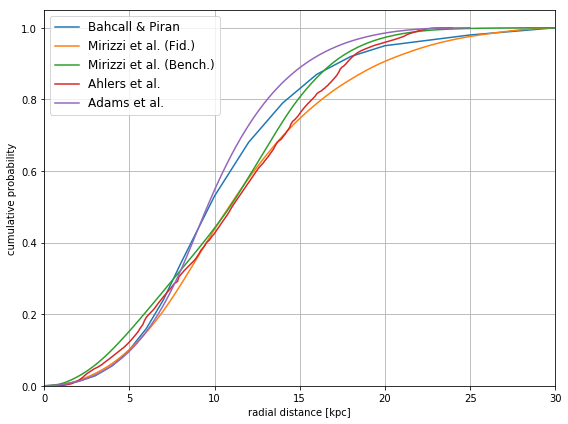

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

for mod, auth, dat in zip(models, authors, radial_data):
    ax.plot(dat['distance'], dat['sn_cdf'], label=auth)

ax.set(xlabel='radial distance [kpc]',
       xlim=(0,30),
       ylabel='cumulative probability',
       ylim=(0,1.05))
ax.grid()
ax.legend(fontsize=12)
fig.tight_layout();

## Generate Radial Data

Generate radial data using the scipy PchipInterpolator (good for monotonic data like CDFs).

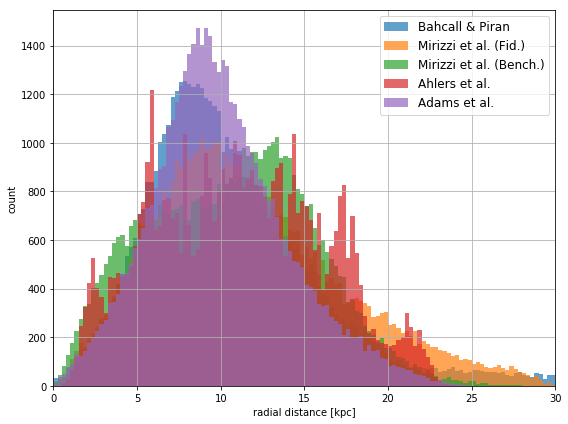

In [4]:
from scipy.interpolate import PchipInterpolator

fig, ax = plt.subplots(1,1, figsize=(8,6))

for mod, auth, dat in zip(models, authors, radial_data):
    cdf = PchipInterpolator(dat['sn_cdf'], dat['distance'])
    u = np.random.uniform(0.,1., 50000)
    distances = cdf(u)
    ax.hist(distances, bins=np.linspace(0,30,121), alpha=0.7, label=auth)

ax.set(xlabel='radial distance [kpc]',
       xlim=(0,30),
       ylabel='count')

ax.grid()
ax.legend(fontsize=12)
fig.tight_layout();